# 반갑습니다 13기 여러분

과제를 진행해 볼게요

혹시라도 도저히 모르겠거나 해결이 안되신다면 01040493041로 전화주시거나 카톡주세요!!

# ''' ? ''' 이 있는 부분을 채워주시면 됩니다

나는 내 스타일로 하겠다 하시면 그냥 구현 하셔도 됩니다!!

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

# 1) PCA의 과정을 한번 차근차근 밟아 볼거에요 잘 따라 오세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

#   기본 모듈들을 불러와 줍니다

In [2]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

#   설명변수 x1, x2, x3의 값이 이렇게 있네요

In [3]:
X = np.stack((x1,x2,x3),axis=0)

#   설명변수들을 하나의 행렬로 만들어 줍니다

In [4]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [5]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


1-1) 먼저 PCA를 시작하기 전에 항상!!!!!! 데이터를 scaling 해주어야 해요

https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ 를 참고하시면 도움이 될거에요

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [8]:
features = X_std.T

In [9]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

1-2) 자 그럼 공분산 행렬을 구해볼게요\

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [10]:
cov_matrix = np.cov(features)

In [11]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-3) 이제 고유값과 고유벡터를 구해볼게요

방법은 실습코드에 있어요!!

In [12]:
eigenvalues = lin.eig(cov_matrix)[0]
eigenvectors = lin.eig(cov_matrix)[1]

In [13]:
print(eigenvalues)
print(eigenvectors)

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [14]:
mat = np.zeros((3,3))

In [15]:
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

In [17]:
mat

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

1-4) 자 이제 고유값 분해를 할 모든 준비가 되었어요 고유값 분해의 곱으로 원래 공분산 행렬을 구해보세요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해서 행렬 끼리 곱하시면 됩니다

행렬 곱으로 eigenvector x mat x eigenvector.T 하면 될거에요

In [18]:
np.dot(np.dot(eigenvectors,mat),eigenvectors.T)

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-5) 마지막으로 고유 벡터 축으로 값을 변환해 볼게요

함수로 한번 정의해 보았어요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [19]:
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new, [X.dot(eigenvectors.T[i])]),axis=0)
    return new.T

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [20]:
new_coordinates(X_std,eigenvectors)

# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 2) PCA를 구현해 보세요

위의 과정을 이해하셨다면 충분히 하실 수 있을거에요

In [21]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    scaler = StandardScaler()
    x_std = scaler.fit_transform(X)
    features = x_std.T
    cov_matrix = np.cov(features)
    
    eigenvalues = lin.eig(cov_matrix)[0]
    eigenvectors = lin.eig(cov_matrix)[1]
    
    new_coordinates(x_std,eigenvectors)
    
    new_coordinate = new_coordinates(x_std,eigenvectors)
    
    index = eigenvalues.argsort()
    index = list(index)
    
    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T

In [22]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해볼까요?

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [24]:
pca.fit_transform(X_std)

array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111],
       [ 1.12563709, -0.52680338,  0.06564012],
       [ 2.71174416,  0.63290138,  0.71195473],
       [ 0.03100441, -0.20059783, -0.50339479],
       [-2.29618509,  0.07661447,  0.01087174],
       [ 0.61585248, -0.205764  ,  1.82651199],
       [ 1.73320252,  1.29971699,  0.09045178],
       [ 0.82366049, -0.57164535, -0.27123176],
       [-0.75619512,  0.73995175, -0.76710616],
       [ 0.42344386,  0.26555394, -1.41533681],
       [ 0.39581307, -1.64646874,  0.24104031],
       [ 0.88581498,  0.15195119, -0.82271209],
       [-0.24587691,  0.39139878, -1.15801831],
       [-0.14741103, -1.22874561, -0.03110396],
       [ 0.7161265 , -0.56781471, -0.86180345],
       [-0.24475107,  2.39442622,  1.19337361]])

In [25]:
MYPCA(X,3)
# sklearn과 동일한 값이 나왔다!

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 4) MNIST data에 적용을 해볼게요!

mnist data를 따로 내려받지 않게 압축파일에 같이 두었어요~!!!

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요~!!!

In [26]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_mldata # fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# mnist 손글씨 데이터를 불러옵니다

C:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [27]:
mnist = io.loadmat('mnist-original.mat') 
X = mnist['data'].T
y = mnist['label'].T

In [28]:
# data information

# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [29]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y

In [31]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


# 지금까지 배운 여러 머신러닝 기법들이 있을거에요

4-1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주시고요

4-2) PCA를 이용하여 mnist data를 축소해서 학습을 해주세요 / test error가 제일 작으신 분께 상품을 드리겠습니다 ^0^

특정한 틀 없이 자유롭게 하시면 됩니다!!!!!!!!!

In [ ]:
from sklearn.model_selection import train_test_split
from time import time

# 3가지 model을 사용해서 비교해보자
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# evaluation
from sklearn.metrics import confusion_matrix

## 4-1) Train Test Split

In [33]:
# train_test_split을 통해 데이터를 0.8 : 0.2의 비율로 분할

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], 
                                                    test_size=0.2, random_state=42)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

In [35]:
X_train.describe()
# 보면 0밖에 없는 값들도 있지만 최대값이 254인 컬럼도 존재하는 것으로 보아
# scaling이 필요해보인다.

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.0,56000.0,56000.0,56000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.177179,0.098071,0.044286,0.016536,0.008696,0.001036,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.587082,4.252553,2.689853,1.566497,1.233971,0.245095,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,58.000000,0.0,0.0,0.0,0.0


- Standardization

In [36]:
# Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

- Normalization

In [37]:
# Feature Normalization 
X_train_norm = X_train.astype('float32')
X_test_norm = X_test.astype('float32')

X_train_norm /= 255
X_test_norm /= 255

두 가지 방법으로 나온 데이터를 각각 학습시켜 비교해보기로 하였다.

## 4-2) PCA

pca를 이용해서 누적된 분산의 비율이 80%가 되는 주성분 축을 선택해보자

In [38]:
# Scaled
pca = PCA(n_components=0.8, whiten=True).fit(X_train_std)
"""
### WHITENING ###
이미지를 이용하여 알고리즘을 훈련시킬 때 입력되는 데이터는 어느정도 redundant를 가지게 된다.
이미지에서 인접한 픽셀들은 서로 높게 관련되어 있을 것이기 때문이다.
인접한 픽셀들간의 관련성이 있기 때문에 PCA는 입력 데이터를 더 낮은 차원의 것으로 아주 적은 에러로 근사할 수 있도록 해준다.
"""

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

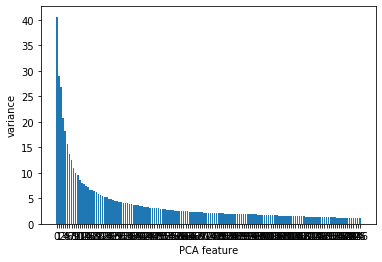

In [39]:
# 각 feature가 설명하는 분산
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [40]:
# Normalized
pca2 = PCA(n_components=0.8, whiten=True).fit(X_train_norm)
"""
### WHITENING ###
이미지를 이용하여 알고리즘을 훈련시킬 때
입력되는 데이터는 어느정도 redundant를 가지게 된다.
이미지에서 인접한 픽셀들은 서로 높게 관련되어 있을 것이기 때문이다.
인접한 픽셀들간의 관련성이 있기 때문에 
PCA는 입력 데이터를 더 낮은 차원의 것으로 아주 적은 에러로 근사할 수 있도록 해준다.
"""

X_train_pca2 = pca2.transform(X_train_norm)
X_test_pca2 = pca2.transform(X_test_norm)

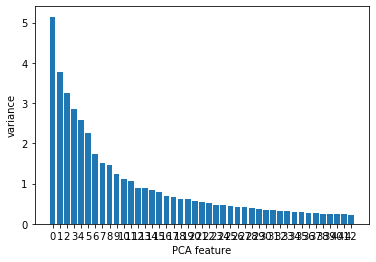

In [41]:
# 각 feature가 설명하는 분산의 비율
features = range(pca2.n_components_)
plt.bar(features, pca2.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### 1) SVM

In [42]:
# Scaled
t0 = time()
svc = SVC(C=0.1, kernel='rbf', gamma=0.1)
svc = svc.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))

done in 2718.724s


In [43]:
print("Train Accuracy: ", svc.score(X_train_pca, y_train))
print("Test Accuracy: ", svc.score(X_test_pca, y_test))

Train Accuracy:  0.46819642857142857
Test Accuracy:  0.38971428571428574


In [45]:
# Normalized
t0 = time()
svc = SVC(C=0.1, kernel='rbf', gamma=0.1)
svc = svc.fit(X_train_pca2, y_train)
print("done in %0.3fs" % (time() - t0))

done in 648.006s


In [46]:
print("Train Accuracy: ", svc.score(X_train_pca2, y_train))
print("Test Accuracy: ", svc.score(X_test_pca2, y_test))

Train Accuracy:  0.867875
Test Accuracy:  0.8175


- 단순히 255로 나누어 0에서 1사이의 값으로 만들어준 경우(Normalized)에 Accuracy가 훨씬 높았다.
- Normalized 데이터를 학습하는데 걸리는 시간 또한 더 빨랐다.
- 따라서 normalized 데이터를 이용해서 parameter를 tuning해주는 방향으로 진행해보기로 하였다.

In [47]:
# C=2 & Gamma=0.1
t0 = time()
svc = SVC(C=2, kernel='rbf', gamma=0.1)
svc = svc.fit(X_train_pca2, y_train)
print("done in %0.3fs" % (time() - t0))

done in 711.982s


In [48]:
print("Train Accuracy: ", svc.score(X_train_pca2, y_train))
print("Test Accuracy: ", svc.score(X_test_pca2, y_test))

Train Accuracy:  0.9999821428571428
Test Accuracy:  0.9712142857142857


In [52]:
# C=2 & Gamma=0.01
t0 = time()
svc2 = SVC(C=2, kernel='rbf', gamma=0.01)
svc2 = svc2.fit(X_train_pca2, y_train)
print("done in %0.3fs" % (time() - t0))

done in 31.850s


In [53]:
print("Train Accuracy: ", svc2.score(X_train_pca2, y_train))
print("Test Accuracy: ", svc2.score(X_test_pca2, y_test))

Train Accuracy:  0.9878214285714285
Test Accuracy:  0.9796428571428571


In [54]:
y_pred = svc.predict(X_test_pca2)
confusion_matrix(y_test, y_pred)

array([[1321,    0,   14,    2,    0,    0,    3,    0,    7,    2],
       [   0, 1554,   14,    3,    2,    1,    1,    1,    4,    1],
       [   1,    1, 1387,    2,    1,    0,    0,    2,    6,    0],
       [   0,    0,   14, 1392,    0,   10,    0,    3,   14,    1],
       [   0,    1,   11,    0, 1295,    0,    0,    1,   12,    8],
       [   2,    0,   12,   10,    1, 1240,    2,    0,   18,    1],
       [   4,    1,   28,    0,    2,    7, 1354,    0,   11,    0],
       [   1,    3,   30,    1,    2,    1,    0, 1422,   10,    6],
       [   0,    5,    8,    4,    1,    8,    0,    1, 1363,    1],
       [   0,    1,   22,   13,    6,    8,    0,    2,   27, 1269]],
      dtype=int64)

In [55]:
y_pred2 = svc2.predict(X_test_pca2)
confusion_matrix(y_test, y_pred2)

array([[1335,    0,    1,    1,    0,    1,    5,    1,    2,    3],
       [   0, 1569,    5,    1,    1,    0,    0,    3,    1,    1],
       [   5,    5, 1372,    1,    2,    0,    3,    7,    5,    0],
       [   2,    0,    7, 1397,    0,   16,    0,    6,    5,    1],
       [   2,    1,    0,    1, 1307,    0,    1,    3,    1,   12],
       [   3,    3,    1,   16,    1, 1244,    6,    1,    7,    4],
       [   5,    1,    4,    0,    2,    1, 1391,    0,    3,    0],
       [   2,    6,    8,    1,    3,    0,    0, 1446,    1,    9],
       [   1,    8,    6,    6,    2,    8,    0,    2, 1352,    6],
       [   1,    2,    2,   11,   15,    2,    0,    7,    6, 1302]],
      dtype=int64)

- SVM에서 가장 높은 경우의 Test Accuracy는 **0.9796428571428571**이 나왔다.

### 2) KNN

In [58]:
# Scaled
t0 = time()
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))

done in 0.724s


In [59]:
t0 = time()
print("Train Accuracy: ", knn.score(X_train_pca, y_train))
print("Test Accuracy: ", knn.score(X_test_pca, y_test))
print("done in %0.3fs" % (time() - t0))

Train Accuracy:  0.9468928571428571
Test Accuracy:  0.9371428571428572
done in 1483.124s


In [60]:
# Normalized
t0 = time()
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca2, y_train)
print("done in %0.3fs" % (time() - t0))

done in 0.264s


In [61]:
t0 = time()
print("Train Accuracy: ", knn.score(X_train_pca2, y_train))
print("Test Accuracy: ", knn.score(X_test_pca2, y_test))
print("done in %0.3fs" % (time() - t0))

Train Accuracy:  0.9727321428571428
Test Accuracy:  0.964
done in 561.405s


- 단순히 255로 나누어 0에서 1사이의 값으로 만들어준 경우(Normalized)에 Accuracy가 훨씬 높았다.
- 따라서 normalized 데이터를 이용해서 parameter를 tuning해주는 방향으로 진행해보기로 하였다.

In [62]:
t0 = time()
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_pca2, y_train)
print("done in %0.3fs" % (time() - t0))

done in 0.225s


In [63]:
t0 = time()
print("Train Accuracy: ", knn2.score(X_train_pca2, y_train))
print("Test Accuracy: ", knn2.score(X_test_pca2, y_test))
print("done in %0.3fs" % (time() - t0))

Train Accuracy:  0.9798214285714286
Test Accuracy:  0.9672142857142857
done in 566.715s


- scaling하지 않은 경우도 보자
- pca의 차원을 50으로 진행해보았다.

In [68]:
pca_k = PCA(n_components=50)
X_train_pcak = pca_k.fit_transform(X_train)
X_test_pcak = pca_k.transform(X_test)

t0 = time()
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train_pcak, y_train)
print("done in %0.3fs" % (time() - t0))

t0 = time()
print("Train Accuracy: ", knn3.score(X_train_pcak, y_train))
print("Test Accuracy: ", knn3.score(X_test_pcak, y_test))
print("done in %0.3fs" % (time() - t0))

done in 0.504s
Train Accuracy:  0.9844285714285714
Test Accuracy:  0.9777857142857143

done in 281.645s


- KNN에서 가장 높은 경우의 Test Accuracy는 **0.9777857142857143**이 나왔다.